<a href="https://colab.research.google.com/github/Bosy-Ayman/Machine_Learning/blob/main/assignment(5)_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

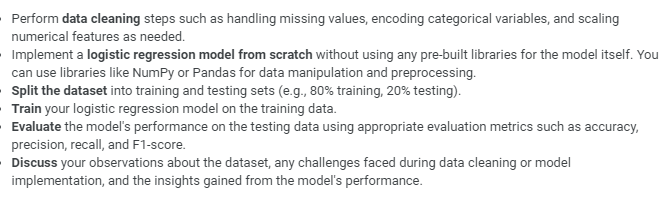

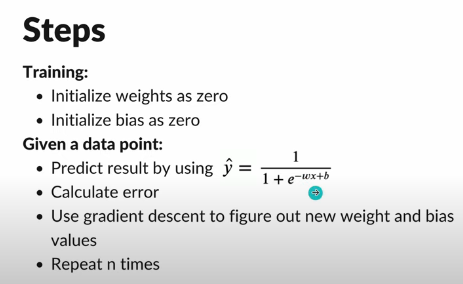

In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# info about the data

The dataset consists of various input parameters related to heart health, such as age, sex, cholesterol levels, and exercise-induced angina.
The target variable represents the presence or absence of a heart attack.
The dataset appears to be relatively small, and feature scaling
# challenges

it contains 1 duplicate value and it need to be scaled as numerical features like age, cholesterol levels, and heart rate may have different scales and require normalization or standardization for effective model training.

# Model Implementation Insights
Defining the sigmoid function, implementing gradient descent for parameter optimization, and incorporating regularization techniques if necessary.
Evaluation metrics: Calculating accuracy, precision, recall, and F1-score provides a comprehensive understanding of the model's performance in predicting heart attacks.
# Achieved performance:

 The model achieved an accuracy of approximately 82%

# Balanced performance
 The model demonstrates a reasonable trade-off between precision and recall, suggesting that it can effectively predict both positive and negative instances of heart attacks.
Potential improvements: Further feature engineering or exploring more advanced machine learning techniques could potentially enhance the model's predictive power




# Importing Dataset

In [445]:
df = pd.read_csv('/content/heart.csv')

In [446]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Explore Data

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [448]:
df.drop_duplicates(inplace=True)

# Spliting data

In [449]:
X = df.drop('target', axis=1).values #features
y = df['target'].values  # target


In [450]:
# Set random seed for reproducibility
np.random.seed(42)

# Shuffle indices
indices = np.random.permutation(len(X))

# 80% training
train_size = int(0.8 * len(X))

# Split data into training and testing sets
X_train, X_test = X[indices[:train_size]], X[indices[train_size:]]
y_train, y_test = y[indices[:train_size]], y[indices[train_size:]]


# Scaling

In [451]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [452]:

X = df.drop('target', axis=1).values
y = df['target'].values


In [453]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [454]:
def classification(w, X):
    y = sigmoid(np.dot(X, w))
    predictions = y > 0.5
    return predictions


In [455]:
def accuracy(w, X, t):
    predictions = classification(w, X)
    correct_predictions = np.sum(predictions == t)
    accuracy = correct_predictions / len(predictions) * 100
    return accuracy

In [456]:
def logistic_loss_reg(w, X, t, alpha=0.1):
    loss = 0
    for x_i, t_i in zip(X, t):
        y_i = sigmoid(np.dot(x_i, w))
        loss -= (t_i * np.log(y_i) + (1 - t_i) * np.log(1 - y_i))
    N = X.shape[0]
    loss /= N
    reg_term = 0.5 * alpha * np.sum(w**2)
    loss += reg_term
    return loss


# Adjusting hyperparameters

In [457]:
lr = 0.01  # Reset learning rate
n_iters = 5000  # Reset number of iterations
alpha = 0.01  # Reset regularization parameter


# Train the logistic regression model with regularization

In [458]:
w = np.random.rand(X_train.shape[1])

for _ in range(n_iters):
    gradient = logistic_gradient_reg(w, X_train, y_train, alpha=alpha)
    w -= lr * gradient

accuracy = accuracy(w, X_test, y_test)

print("Accuracy:", accuracy)


Accuracy: 81.9672131147541


#Evaluation

In [459]:
def accuracy_score(y_true, y_pred):
    correct = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred))
    total = len(y_true)
    return correct / total

def precision_score(y_true, y_pred):
    true_positives = sum((y_t == 1) and (y_p == 1) for y_t, y_p in zip(y_true, y_pred))
    predicted_positives = sum(y_p == 1 for y_p in y_pred)
    return true_positives / predicted_positives

def recall_score(y_true, y_pred):
    true_positives = sum((y_t == 1) and (y_p == 1) for y_t, y_p in zip(y_true, y_pred))
    actual_positives = sum(y_t == 1 for y_t in y_true)
    return true_positives / actual_positives

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)

y_pred_test = [1 if sigmoid(np.dot(x_i, w)) > 0.5 else 0 for x_i in X_test]

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.819672131147541
Precision: 0.8055555555555556
Recall: 0.8787878787878788
F1-score: 0.8405797101449276
